In [29]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta 
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r'C:\Users\vs390\OneDrive\Desktop\Swiggy instamart delivery prediction\data\test.csv')
dataset['Date']=pd.to_datetime(dataset['Date'],errors='coerce')
dataset['Day_of_Week']=dataset['Date'].dt.day_name()
dataset.head(2)

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
0,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Milk,143,Clear,Moderate,0,...,19.320305,26-35,4.089132,True,80.454587,True,23.395002,1.366587,1.985490,7.916775
1,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Bread,121,Clear,Moderate,0,...,16.529100,18-25,4.403027,False,43.380880,True,20.877744,1.421246,1.043545,5.236938


In [3]:
product_data=dataset[(dataset['Product']=='Milk') &
                     (dataset['Order_Volume'])]

In [4]:
output=[]
window_size=7
for location in product_data['Location'].unique():
    loc_data=product_data[product_data['Location']==location]
    
    for i in range(len(loc_data)):
        if i < window_size :
            actual_value=loc_data['Order_Volume'].iloc[i]
            predicted_volume=None 
            percentage_change=None
            output.append([location,i+1,actual_value,None,predicted_volume,percentage_change])
        else:
            alpha=0.6
            ewma_pred=loc_data['Order_Volume'].iloc[i - window_size:i].ewm(span=window_size, adjust=False).mean().iloc[-1]
            actual_value=loc_data['Order_Volume'].iloc[i]   
            percentage_change=((actual_value-ewma_pred)/ewma_pred)*100 if ewma_pred !=0 else 0
            output.append([location,i+1,actual_value,i+1,ewma_pred,percentage_change])
output_df=pd.DataFrame(output,columns=['Location','Day','Order_Volume','Predicted_day','Predicted_Volume','Percentage_Change'])
output_df.head(14)

,Location,Day,Order_Volume,Predicted_day,Predicted_Volume,Percentage_Change
0,Koramangala,1,143,NaN,NaN,NaN
1,Koramangala,2,145,NaN,NaN,NaN
2,Koramangala,3,123,NaN,NaN,NaN
3,Koramangala,4,121,NaN,NaN,NaN
4,Koramangala,5,121,NaN,NaN,NaN
5,Koramangala,6,459,NaN,NaN,NaN
6,Koramangala,7,141,NaN,NaN,NaN
7,Koramangala,8,117,8.0,194.872559,-39.960762
8,Koramangala,9,139,9.0,175.671387,-20.874991
9,Koramangala,10,175,10.0,163.566895,6.989865


In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=output_df.tail(7)['Day'], y=output_df.tail(7)['Order_Volume'], mode='lines', name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=output_df.tail(7)['Day'], y=output_df.tail(7)['Predicted_Volume'], mode='lines', name='Predicted', line=dict(color='orange', dash='dash')))
fig.update_layout(title="Actual vs Predicted (Last 7 Days)", xaxis_title="Day", yaxis_title="Order Volume", plot_bgcolor="white")
fig.show()

In [6]:
product_data=dataset[(dataset['Product']=='Bread') &
                     (dataset['Order_Volume'])]

In [7]:
output=[]
window_size=7
for location in product_data['Location'].unique():
    loc_data=product_data[product_data['Location']==location]
    
    for i in range(len(loc_data)):
        if i < window_size :
            actual_value=loc_data['Order_Volume'].iloc[i]
            predicted_volume=None 
            percentage_change=None
            output.append([location,i+1,actual_value,None,predicted_volume,percentage_change])
        else:
            alpha=0.6
            ewma_pred=loc_data['Order_Volume'].iloc[i - window_size:i].ewm(span=window_size, adjust=False).mean().iloc[-1]
            actual_value=loc_data['Order_Volume'].iloc[i]   
            percentage_change=((actual_value-ewma_pred)/ewma_pred)*100 if ewma_pred !=0 else 0
            output.append([location,i+1,actual_value,i+1,ewma_pred,percentage_change])
output_df=pd.DataFrame(output,columns=['Location','Day','Order_Volume','Predicted_day','Predicted_Volume','Percentage_Change'])
output_df.head(14)

,Location,Day,Order_Volume,Predicted_day,Predicted_Volume,Percentage_Change
0,Koramangala,1,121,NaN,NaN,NaN
1,Koramangala,2,119,NaN,NaN,NaN
2,Koramangala,3,391,NaN,NaN,NaN
3,Koramangala,4,485,NaN,NaN,NaN
4,Koramangala,5,127,NaN,NaN,NaN
5,Koramangala,6,159,NaN,NaN,NaN
6,Koramangala,7,139,NaN,NaN,NaN
7,Koramangala,8,125,8.0,193.098145,-35.266079
8,Koramangala,9,123,9.0,175.806641,-30.036772
9,Koramangala,10,111,10.0,198.912598,-44.196596


In [8]:
last_7_days = output_df.tail(7)
fig = go.Figure()
fig.add_trace(go.Scatter(x=last_7_days['Day'], y=last_7_days['Order_Volume'], mode='lines', name='Actual', line=dict(color='blue', width=3)))
fig.add_trace(go.Scatter(x=last_7_days['Day'], y=last_7_days['Predicted_Volume'], mode='lines', name='Predicted', line=dict(color='orange', width=3, dash='dash')))
fig.update_layout(title="Actual vs Predicted Order Volume (Last 7 Days)", xaxis_title="Day", yaxis_title="Order Volume", plot_bgcolor="white")
fig.show()

In [9]:
product_data=dataset[(dataset['Product']=='Snacks') &
                     (dataset['Order_Volume'])]

In [10]:
output=[]
window_size=7
for location in product_data['Location'].unique():
    loc_data=product_data[product_data['Location']==location]
    
    for i in range(len(loc_data)):
        if i < window_size :
            actual_value=loc_data['Order_Volume'].iloc[i]
            predicted_volume=None 
            percentage_change=None
            output.append([location,i+1,actual_value,None,predicted_volume,percentage_change])
        else:
            alpha=0.6
            ewma_pred=loc_data['Order_Volume'].iloc[i - window_size:i].ewm(span=window_size, adjust=False).mean().iloc[-1]
            actual_value=loc_data['Order_Volume'].iloc[i]   
            percentage_change=((actual_value-ewma_pred)/ewma_pred)*100 if ewma_pred !=0 else 0
            output.append([location,i+1,actual_value,i+1,ewma_pred,percentage_change])
output_df=pd.DataFrame(output,columns=['Location','Day','Order_Volume','Predicted_day','Predicted_Volume','Percentage_Change'])
output_df.head(14)

,Location,Day,Order_Volume,Predicted_day,Predicted_Volume,Percentage_Change
0,Koramangala,1,117,NaN,NaN,NaN
1,Koramangala,2,123,NaN,NaN,NaN
2,Koramangala,3,131,NaN,NaN,NaN
3,Koramangala,4,135,NaN,NaN,NaN
4,Koramangala,5,387,NaN,NaN,NaN
5,Koramangala,6,123,NaN,NaN,NaN
6,Koramangala,7,393,NaN,NaN,NaN
7,Koramangala,8,385,8.0,228.455566,68.522924
8,Koramangala,9,139,9.0,268.392578,-48.210192
9,Koramangala,10,161,10.0,237.112305,-32.099686


In [11]:

last_7_days = output_df.tail(7)

fig = go.Figure()

fig.add_trace(go.Scatter(x=last_7_days['Day'], y=last_7_days['Order_Volume'], mode='lines', name='Actual', line=dict(color='blue', width=3)))
fig.add_trace(go.Scatter(x=last_7_days['Day'], y=last_7_days['Predicted_Volume'], mode='lines', name='Predicted', line=dict(color='orange', width=3, dash='dash')))

fig.update_layout(title="Actual vs Predicted Order Volume (Last 7 Days)", xaxis_title="Day", yaxis_title="Order Volume", plot_bgcolor="white")
fig.show()



Training and predicting for Snacks in Koramangala


C:\Users\vs390\AppData\Local\Temp\ipykernel_24152\1093079719.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



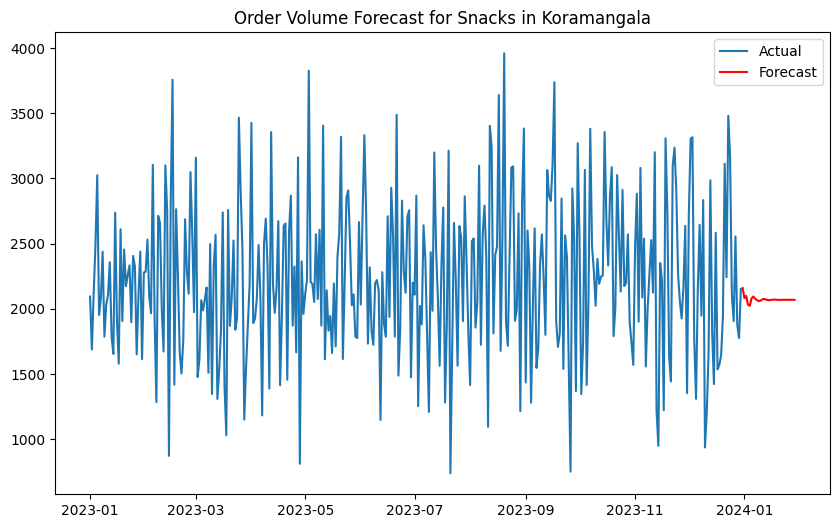


Training and predicting for Snacks in Indiranagar


C:\Users\vs390\AppData\Local\Temp\ipykernel_24152\1093079719.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



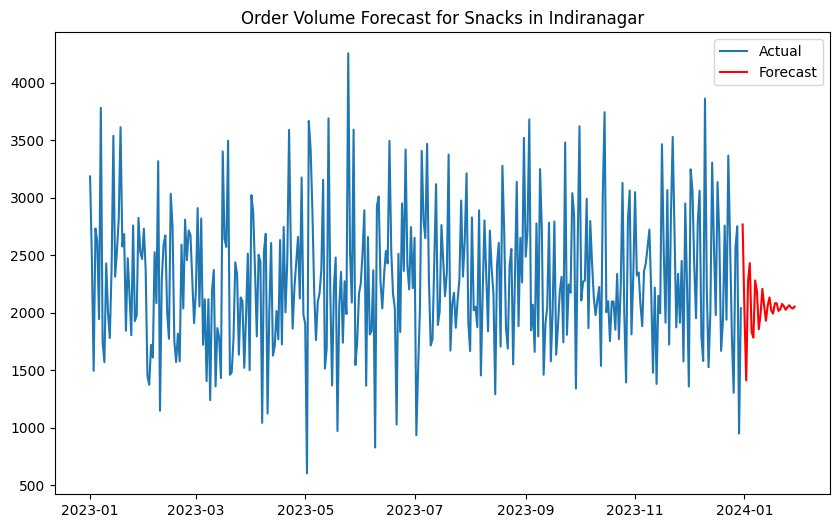


Training and predicting for Snacks in Whitefield


C:\Users\vs390\AppData\Local\Temp\ipykernel_24152\1093079719.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



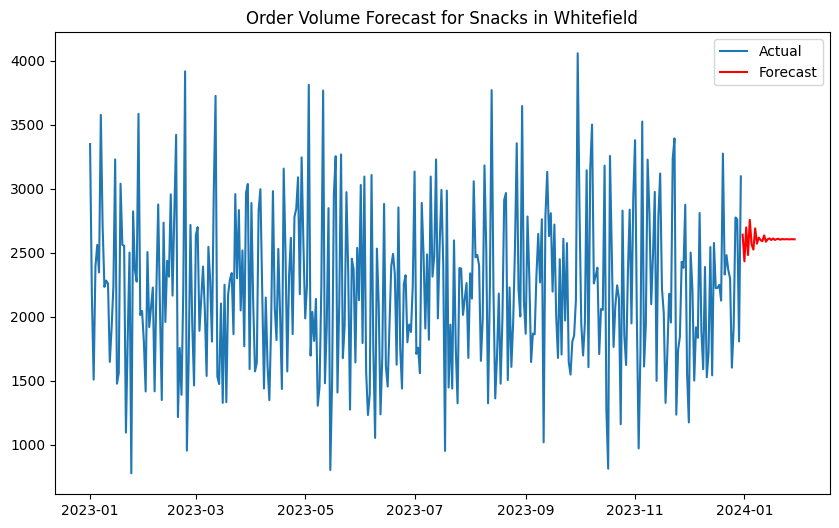

         Location  Day  Order_Volume  Predicted_day  Predicted_Volume
0     Koramangala    1        2094.0            NaN               NaN
1     Koramangala    2        1688.0            NaN               NaN
2     Koramangala    3        2112.0            NaN               NaN
3     Koramangala    4        2488.0            NaN               NaN
4     Koramangala    5        3025.0            NaN               NaN
...           ...  ...           ...            ...               ...
1177   Whitefield  390           NaN          390.0       2605.037165
1178   Whitefield  391           NaN          391.0       2602.935845
1179   Whitefield  392           NaN          392.0       2604.958519
1180   Whitefield  393           NaN          393.0       2604.124538
1181   Whitefield  394           NaN          394.0       2603.901471

[1182 rows x 5 columns]


In [48]:

def train_predict_arima(product_data, location, product, days_for_training=30, days_to_predict=30):
    df_filtered = product_data[(product_data['Location'] == location) & (product_data['Product'] == product)]
    df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
    df_filtered = df_filtered.set_index('DateTime')
    df_filtered = df_filtered.resample('D').agg({'Order_Volume': 'sum'})
    train_data = df_filtered[-days_for_training:]

    model = ARIMA(train_data['Order_Volume'], order=(5, 1, 0))  
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=days_to_predict)
    forecast_dates = pd.date_range(train_data.index[-1] + timedelta(days=1), periods=days_to_predict)
    results_df = pd.DataFrame({
        'Location': location,
        'Day': list(range(1, len(df_filtered) + 1)) + list(range(len(df_filtered) + 1, len(df_filtered) + 1 + days_to_predict)),
        'Order_Volume': list(df_filtered['Order_Volume'].values) + [None] * days_to_predict, 
        'Predicted_day': [None] * len(df_filtered) + list(range(len(df_filtered) + 1, len(df_filtered) + 1 + days_to_predict)),
        'Predicted_Volume': [None] * len(df_filtered) + list(forecast)  
    })
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered.index, df_filtered['Order_Volume'], label='Actual')
    plt.plot(forecast_dates, forecast, label='Forecast', color='red')
    plt.title(f"Order Volume Forecast for {product} in {location}")
    plt.legend()
    plt.show()

    return results_df
def predict_for_all(product_data):
    locations = product_data['Location'].unique()
    products = product_data['Product'].unique()

    all_results = pd.DataFrame()  
    for location in locations:
        for product in products:
            print(f"\nTraining and predicting for {product} in {location}")
            results_df = train_predict_arima(product_data, location, product)
            all_results = pd.concat([all_results, results_df], ignore_index=True)
    print(all_results)
predict_for_all(product_data)